# Wstęp

xd

# Opis zjawisk/podstawy teoretyczne

xd

# Wyniki 

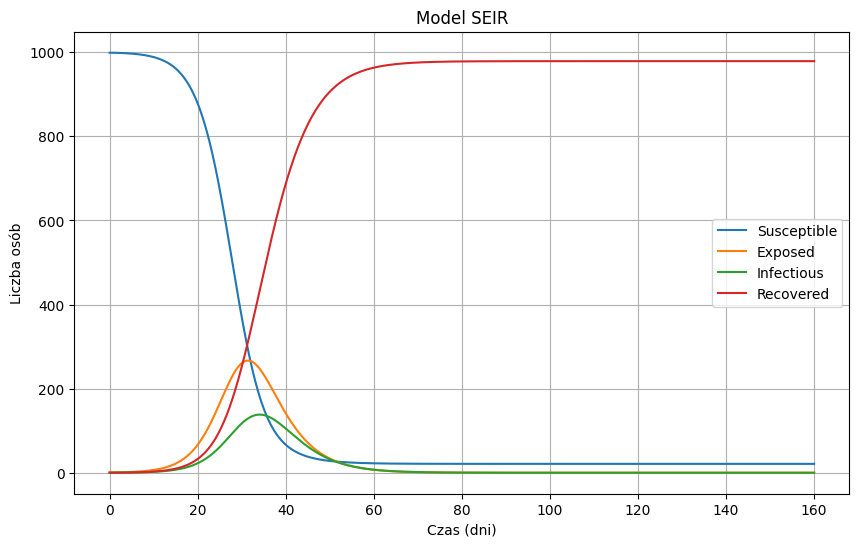

In [1]:
import os
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import datetime
import requests  # To fetch data from an API or webpage
from bs4 import BeautifulSoup  # To scrape data if API is unavailable

def fetch_real_data():
    # Placeholder function to fetch or scrape real data
    url = "https://koronawirusunas.pl/"
    response = requests.get(url)
    if response.status_code == 200:
        # Parse the data using BeautifulSoup or extract JSON if API is available
        soup = BeautifulSoup(response.text, 'html.parser')
        # Extract values for N, beta, etc.
        # For example:
        N = 1000  # Replace with parsed value
        beta = 1.34  # Replace with parsed value
        sigma = 0.19  # Replace with parsed value
        gamma = 0.34  # Replace with parsed value
        return N, beta, sigma, gamma
    else:
        raise Exception("Failed to fetch data")

def seir_graph(N, S, E, I, R, beta, sigma, gamma):
    def seir_model(t, y, N, beta, sigma, gamma):
        S, E, I, R = y
        dSdt = -beta * S * I / N
        dEdt = beta * S * I / N - sigma * E
        dIdt = sigma * E - gamma * I
        dRdt = gamma * I
        return dSdt, dEdt, dIdt, dRdt

    t_max = 160
    t_eval = np.linspace(0, t_max, 1000)

    solution = solve_ivp(seir_model, [0, t_max], [S, E, I, R],
                         args=(N, beta, sigma, gamma), t_eval=t_eval)
    S, E, I, R = solution.y

    date = datetime.datetime.today().strftime("%Y_%m_%d_%H_%M_%S")

    if not os.path.exists("../plots"):
        os.makedirs("../plots")
    if not os.path.exists("../simulations"):
        os.makedirs("../simulations")

    plt.figure(figsize=(10, 6))
    plt.plot(solution.t, S, label='Susceptible')
    plt.plot(solution.t, E, label='Exposed')
    plt.plot(solution.t, I, label='Infectious')
    plt.plot(solution.t, R, label='Recovered')
    plt.xlabel('Czas (dni)')
    plt.ylabel('Liczba osób')
    plt.title('Model SEIR')
    plt.legend()
    plt.grid(True)

    plt.savefig(os.path.join("../plots", f"plot{date}.png"))
    np.savetxt(os.path.join("../simulations", f"simulation{date}.txt"), solution.y)

if __name__ == "__main__":
    try:
        N, beta, sigma, gamma = fetch_real_data()
        S, E, I, R = N - 1, 1, 0, 0  # Example initialization
        seir_graph(N, S, E, I, R, beta, sigma, gamma)
    except Exception as e:
        print(f"Error: {e}")


# Podsumowanie i wnioski

xd

# Literatura

xd